1. Combine the to one csv

In [13]:
import pandas as pd
import os

def join_csv_files(input_folder, output_file):
    """
    Joins multiple CSV files in the specified folder into a single CSV file.

    Parameters:
        input_folder (str): Path to the folder containing the CSV files.
        output_file (str): Path to save the consolidated CSV file.
    """
    # List to store individual DataFrames
    dataframes = []
    
    # Loop through all files in the input folder
    for file in os.listdir(input_folder):
        if file.endswith('.csv'):
            file_path = os.path.join(input_folder, file)
            try:
                # Read each CSV into a DataFrame
                df = pd.read_csv(file_path)
                dataframes.append(df)
            except Exception as e:
                print(f"Error reading {file}: {e}")

    # Combine all DataFrames into a single DataFrame
    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        # Save the combined DataFrame to a new CSV file
        combined_df.to_csv(output_file, index=False)
        print(f"Combined CSV saved as: {output_file}")
    else:
        print("No CSV files found in the folder.")

# Example usage
input_folder = "/home/eric-kaz/Desktop/Semester4.1/KnowledgeBaseSystems/trial1/Assignment2/OriginalData"  # Replace with the folder containing CSV files
output_file = "/home/eric-kaz/Desktop/Semester4.1/KnowledgeBaseSystems/trial1/Assignment2/ModifiedData/combined.csv"  # Replace with the desired output file path
join_csv_files(input_folder, output_file)


Combined CSV saved as: /home/eric-kaz/Desktop/Semester4.1/KnowledgeBaseSystems/trial1/Assignment2/ModifiedData/combined.csv


Read and drop the null values 

In [14]:
import pandas as pd

def drop_features_with_missing_values(input_file, output_file):
    """
    Drops features with missing values from a CSV file and saves the cleaned data.

    Parameters:
        input_file (str): Path to the input CSV file.
        output_file (str): Path to save the cleaned CSV file.
    """
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(input_file)

        # Display the number of missing values per feature (optional)
        print("Missing values per feature before dropping:")
        print(df.isnull().sum())

        # Drop features (columns) with any missing values
        cleaned_df = df.dropna(axis=1)

        # Display the resulting DataFrame shape (optional)
        print(f"\nShape before dropping features: {df.shape}")
        print(f"Shape after dropping features: {cleaned_df.shape}")
        print(f"\n Resulting df sample : {cleaned_df.head()}")

        # Save the cleaned DataFrame to a new CSV file
        cleaned_df.to_csv(output_file, index=False)
        print(f"\nCleaned CSV saved as: {output_file}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
input_file = "/home/eric-kaz/Desktop/Semester4.1/KnowledgeBaseSystems/trial1/Assignment2/ModifiedData/combined.csv"  # Replace with the desired output file path
output_file = "/home/eric-kaz/Desktop/Semester4.1/KnowledgeBaseSystems/trial1/Assignment2/ModifiedData/cleaned.csv"  # Replace with the desired output file path
drop_features_with_missing_values(input_file, output_file)


/tmp/ipykernel_10691/1989756529.py:13: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)


Missing values per feature before dropping:
DATE         10583
CODE             0
NAME            48
12m Low          0
12m High         0
Day Low          0
Day High         0
Day Price        0
Previous         0
Change           0
Change%          0
Volume           0
Adjust       10583
Date         70921
Adjusted     70921
dtype: int64

Shape before dropping features: (81504, 15)
Shape after dropping features: (81504, 10)

 Resulting df sample :    CODE 12m Low 12m High Day Low Day High Day Price Previous Change Change%  \
0  EGAD      22       57      52       52        52       52      -       -   
1  KAPC     111      148     100      100       100     98.5    1.5   1.50%   
2  KUKZ    67.5       89    42.5       45      43.5    42.25   1.25   2.87%   
3   REA    14.5     23.5      25     26.5      25.5    25.75  -0.25   0.98%   
4  SASN    10.5     13.6     140      145       140      141     -1   0.71%   

   Volume  
0     300  
1   7,800  
2   2,700  
3  10,500  
4  70,900  

Remove a specific stock 

In [15]:
import pandas as pd

def extract_stock_data(input_file, stock_code, output_file):
    """
    Extracts data for a specific stock based on its unique CODE and saves it to a new CSV file.

    Parameters:
        input_file (str): Path to the input CSV file.
        stock_code (str): Unique CODE of the stock to extract.
        output_file (str): Path to save the extracted stock data.
    """
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(input_file)

        # Filter the DataFrame for the specified stock CODE
        stock_data = df[df['CODE'] == stock_code]

        # Check if any data was found
        if stock_data.empty:
            print(f"No data found for stock CODE: {stock_code}")
        else:
            # Save the filtered data to a new CSV file
            stock_data.to_csv(output_file, index=False)
            print(f"Data for stock CODE '{stock_code}' saved to: {output_file}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
input_file = "/home/eric-kaz/Desktop/Semester4.1/KnowledgeBaseSystems/trial1/Assignment2/ModifiedData/cleaned.csv"  # Replace with the desired output file path
stock_code = "KAPC"  # Replace with the unique CODE of the stock you want to extract
output_file = "/home/eric-kaz/Desktop/Semester4.1/KnowledgeBaseSystems/trial1/Assignment2/ModifiedData/KAPC.csv"  # Replace with the desired output file path
extract_stock_data(input_file, stock_code, output_file)


Data for stock CODE 'KAPC' saved to: /home/eric-kaz/Desktop/Semester4.1/KnowledgeBaseSystems/trial1/Assignment2/ModifiedData/KAPC.csv


Drop the Unnecessary columns

In [16]:
data = pd.read_csv('ModifiedData/EQTY.csv')

columns_to_drop = ['12m Low','12m High','Change','Change%','Volume']

data.drop(columns=columns_to_drop, inplace=True)

print(data.head())


   CODE  Day Low  Day High  Day Price  Previous
0  EQTY    140.0     145.0      141.0     138.0
1  EQTY    140.0     150.0      144.0     141.0
2  EQTY    146.0     157.0      154.0     144.0
3  EQTY    155.0     170.0      167.0     154.0
4  EQTY    170.0     185.0      179.0     167.0


Train test split the data 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Select features and target
X = data[['Previous', 'Day High', 'Day Low']]  # Features
y = data['Day Price']  # Target (next day's price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Hyperparaeter tuning for KNN

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid search
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)


# Build a DataFrame of results
results = pd.DataFrame(grid_search.cv_results_)
results_sorted = results[['mean_test_score', 'param_n_neighbors', 'param_weights', 'param_metric']].sort_values(by='mean_test_score', ascending=False)
results_sorted['mean_test_score'] = -results_sorted['mean_test_score']  # Convert negative MSE to positive

results_sorted

,mean_test_score,param_n_neighbors,param_weights,param_metric
15,0.513261,9,distance,manhattan
13,0.535988,7,distance,manhattan
11,0.552774,5,distance,manhattan
5,0.644489,7,distance,euclidean
7,0.659649,9,distance,euclidean
3,0.668671,5,distance,euclidean
9,0.723578,3,distance,manhattan
1,0.966261,3,distance,euclidean
8,2.306432,3,uniform,manhattan
10,2.610892,5,uniform,manhattan


Retreive the best kNN model for evaluation

In [19]:
# Retrieve the best model
best_model = grid_search.best_estimator_

Training the linear regressor model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = linear_model.score(X_test, y_test)

# Output the evaluation metrics
print(f'mean squared error is: {mse}')
mae, r2_score

mean squared error is: 4.406622503433731


(np.float64(0.7163716663725411), 0.9993571586520698)

Baseline regressors 

In [21]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

# Define baseline strategies
strategies = ['mean', 'median', 'constant']

# Dictionary to store results
results = {}

for strategy in strategies:
    if strategy == 'constant':
        # Use a constant value (e.g., predict 0)
        baseline_model = DummyRegressor(strategy=strategy, constant=0)
    else:
        baseline_model = DummyRegressor(strategy=strategy)
    
    # Fit the baseline model
    baseline_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = baseline_model.predict(X_test)
    
    # Evaluate the baseline model
    mse = mean_squared_error(y_test, y_pred)
    
    # Save the results
    results[strategy] = {'MSE': mse}

# Display the results
for strategy, metrics in results.items():
    print(f"Strategy: {strategy}")
    print(f"  Mean Squared Error: {metrics['MSE']:.2f}")


Strategy: mean
  Mean Squared Error: 6859.89
Strategy: median
  Mean Squared Error: 9439.34
Strategy: constant
  Mean Squared Error: 12606.21


Now we compare evaluate the models based on metrics r^2, mse , rmse and accuracy (derived from mean absolute percentage error(mape))

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Best baseline regressor
baseline_model = DummyRegressor(strategy="mean")
baseline_model.fit(X_train, y_train)
baseline_preds = baseline_model.predict(X_test)

# Predictions from best KNN regressor and Linear Regression
knn_model = grid_search.best_estimator_
knn_preds = knn_model.predict(X_test)
linear_preds = linear_model.predict(X_test)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # MAPE as a percentage
    return mse, rmse, r2, mape

# Calculate metrics for each model
baseline_metrics = calculate_metrics(y_test, baseline_preds)
knn_metrics = calculate_metrics(y_test, knn_preds)
linear_metrics = calculate_metrics(y_test, linear_preds)

results = [
    {
        "Model": "Baseline Regressor",
        "MSE": baseline_metrics[0],
        "RMSE": baseline_metrics[1],
        "R^2": baseline_metrics[2],
        "Accuracy (MAPE)": 100 - baseline_metrics[3]  # Accuracy as 100 - MAPE
    },
    {
        "Model": "KNN Regressor",
        "MSE": knn_metrics[0],
        "RMSE": knn_metrics[1],
        "R^2": knn_metrics[2],
        "Accuracy (MAPE)": 100 - knn_metrics[3]  # Accuracy as 100 - MAPE
    },
    {
        "Model": "Linear Regression",
        "MSE": linear_metrics[0],
        "RMSE": linear_metrics[1],
        "R^2": linear_metrics[2],
        "Accuracy (MAPE)": 100 - linear_metrics[3]  # Accuracy as 100 - MAPE
    },
]

# Convert to a DataFrame for display
results_df = pd.DataFrame(results)

# Display the table
print("Model Performance Comparison:")
print(results_df)


Model Performance Comparison:
                Model          MSE       RMSE       R^2  Accuracy (MAPE)
0  Baseline Regressor  6859.894815  82.824482 -0.000727      -113.037414
1       KNN Regressor     0.146327   0.382527  0.999979        99.865153
2   Linear Regression     4.406623   2.099196  0.999357        99.257581


Now we draw error plots and residual plots to visualise the results 

RESIDUAL PLOTS 
in this case the residual maps a predicted data point value(x axis especially its index) to its distance from its actual value (y axis ie residual)

Baseline Regressor Residuals:


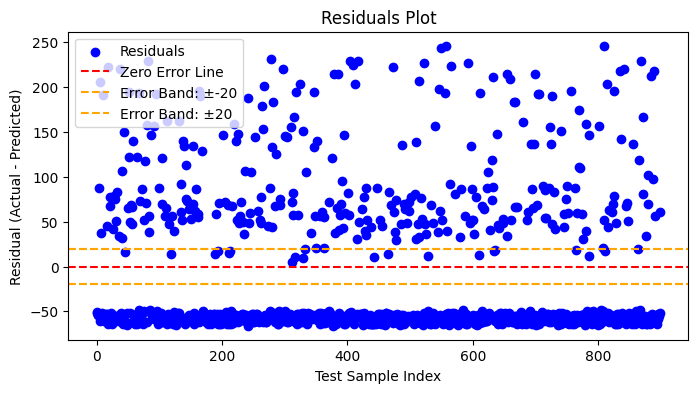

KNN Regressor Residuals:


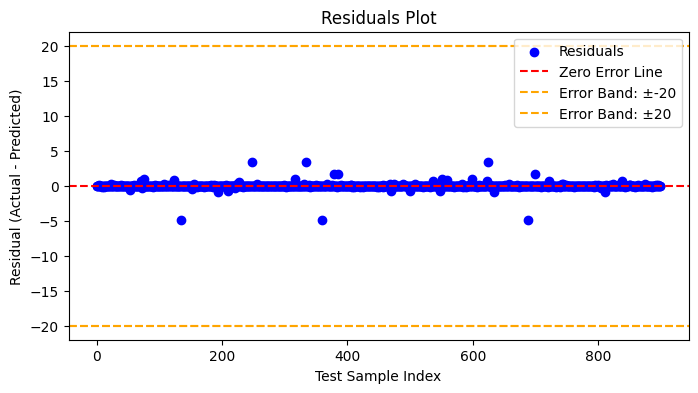

Linear Regression Residuals:


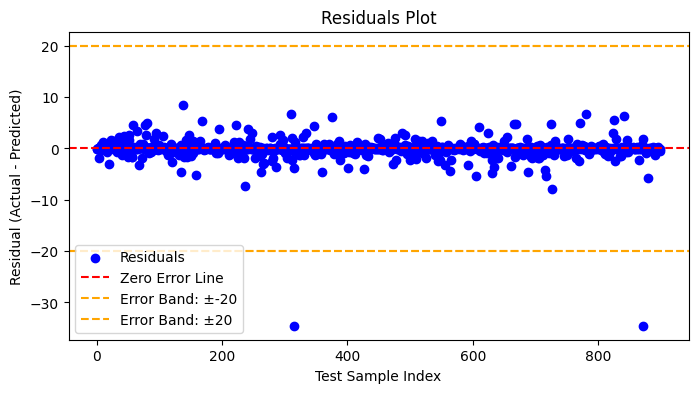

In [ ]:
import matplotlib.pyplot as plt

# Define the regression_errors function
def regression_errors(figsize, preds, actuals, errors=None):
    """
    Plots prediction errors (residuals) with optional error bands.
    """
    residuals = actuals - preds

    plt.figure(figsize=figsize)
    plt.scatter(range(len(residuals)), residuals, color='blue', label="Residuals")
    plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
    
    if errors:
        for err in errors: #This is because a certain unit of error can be allowed at times
            plt.axhline(err, color='orange', linestyle='--', label=f'Error Band: ±{err}')
            plt.axhline(-err, color='orange', linestyle='--')
    
    plt.title("Residuals Plot")
    plt.xlabel("Test Sample Index")
    plt.ylabel("Residual (Actual - Predicted)")
    plt.legend()
    plt.show()

# Generate predictions for all models
baseline_preds = baseline_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
linear_preds = linear_model.predict(X_test)

# Plot residuals for each model
print("Baseline Regressor Residuals:")
regression_errors((8, 4), baseline_preds, y_test, errors=[-20, 20])

print("KNN Regressor Residuals:")
regression_errors((8, 4), knn_preds, y_test, errors=[-20, 20])

print("Linear Regression Residuals:")
regression_errors((8, 4), linear_preds, y_test, errors=[-20, 20])
